In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [3]:
def display(array1, array2):
    n = 8  # Nombre d'images à afficher

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    img_height, img_width = images1.shape[1:3]  # Taille dynamique des images

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        # Afficher l'image originale
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(img_height, img_width), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Afficher l'image bruitée ou prédite
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(img_height, img_width), cmap="gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [4]:
def make_some_noise(array):

    noise_factor = 0.35
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2

def load_astronomy_images(image_dir, img_size=(128, 128)):
    images = []
    for file_path in glob.glob(f"{image_dir}/*.jpg"):  # Modifier l'extension si nécessaire
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris
        if img is None:  # Vérifiez si l'image est chargée
            print(f"Erreur de chargement pour {file_path}. Ignoré.")
            continue
        print(f"Image chargée avec succès : {file_path}")
        img = cv2.resize(img, img_size)  # Redimensionner
        images.append(img)
    if not images:  # Aucun fichier valide n'a été chargé
        raise ValueError("Aucune image valide trouvée dans le dossier spécifié.")
    images = np.array(images).astype("float32") / 255.0  # Normalisation
    return np.expand_dims(images, axis=-1)  # Ajouter la dimension de canal

# Charger les données
image_dir = "/content/drive/MyDrive/images"
astro_images = load_astronomy_images(image_dir)

# Séparer en données d'entraînement et de test
np.random.shuffle(astro_images)
split = int(len(astro_images) * 0.8)
train_data = astro_images[:split]
test_data = astro_images[split:]

Image chargée avec succès : /content/drive/MyDrive/images/4291.jpg
Image chargée avec succès : /content/drive/MyDrive/images/435.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4327.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4364.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4355.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4337.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4333.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4328.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4359.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4362.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4365.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4363.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4334.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4335.jpg
Image chargée avec succès : /content/drive/MyDrive/images/4346.

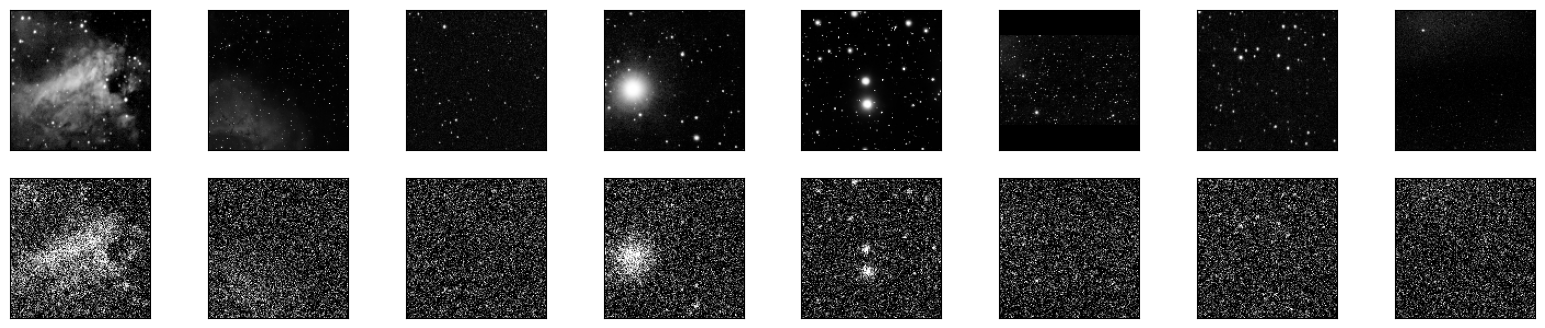

In [6]:
# Ajouter du bruit
noisy_train_data = make_some_noise(train_data)
noisy_test_data = make_some_noise(test_data)

# Afficher des exemples
display(train_data, noisy_train_data)

In [7]:
input = layers.Input(shape=(128, 128, 1))  # Dimensions des images

# Encoder
model = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
model = layers.MaxPooling2D((2, 2), padding="same")(model)
model = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(model)
model = layers.MaxPooling2D((2, 2), padding="same")(model)

# Decoder
model = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(model)
model = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(model)
model = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(model)

# Autoencoder
ae = Model(input, model)
ae.compile(optimizer="adam", loss="binary_crossentropy")
ae.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

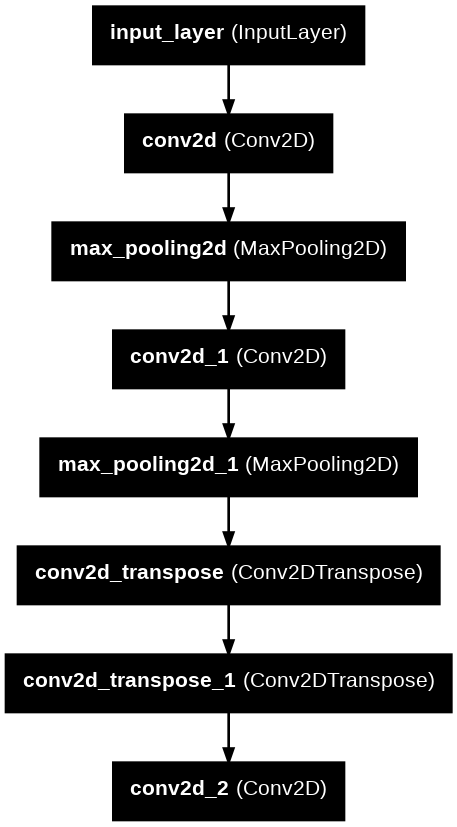

In [10]:
tensorflow.keras.utils.plot_model(
    ae,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [8]:
ae.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 280s 9s/step - loss: 0.5296 - val_loss: 0.2558
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 326s 9s/step - loss: 0.2486 - val_loss: 0.2297
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 311s 9s/step - loss: 0.2312 - val_loss: 0.2193
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 330s 9s/step - loss: 0.2220 - val_loss: 0.2104
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step - loss: 0.2132 - val_loss: 0.2083
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 275s 9s/step - loss: 0.2136 - val_loss: 0.2074
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 320s 9s/step - loss: 0.2120 - val_loss: 0.2069
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 320s 9s/step - loss: 0.2125 - val_loss: 0.2065
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 322s 9s/step - loss: 0.2116 - val_loss: 0.2063
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 328s 9s/step - loss: 0.2114 - val_loss: 0.2061
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 316s 9s/step - loss: 0.2107 - val_loss: 0.2060
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 326s 9s/step - loss: 0.2

30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 603ms/step


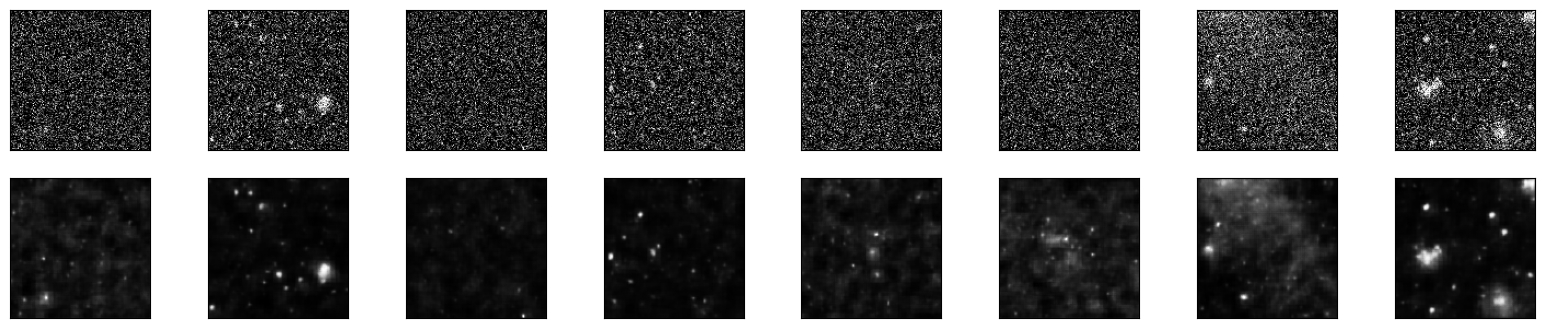

In [9]:
predictions = ae.predict(noisy_test_data)
display(noisy_test_data, predictions)

In [11]:
# Sauvegarder le modèle
ae.save('denoising_model.h5')